# RoleSim
----
Similarity measure from the **automorphic** equivalence family.

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from RoleSim.RoleSim import *

## Replies

### small sample, using *replies-253.graphml*

In [73]:
# Load directed graph
directed_graph = nx.read_graphml('graphs/replies-253.graphml')
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")


Number of nodes: 253
Number of edges: 1404


In [74]:
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 205
Number of edges: 1404


In [75]:
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 205
Number of edges: 1404


In [76]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
global actual_data_graph
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 205
Number of edges: 1404


In [77]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
# nx.write_graphml(current_iteration, f'results/rolesim/replies-{actual_data_graph.number_of_nodes()}-similarity.graphml')
nx.write_graphml(current_iteration, f'results/rolesim/replies-253-similarity.graphml')

27  nodes were inserted in the graph.
20082  nodes were pruned by rule 1.
414  nodes were pruned by rule 2.
387  nodes were pruned by rule 3.
30
27
[1, 18, 116, 155, 168, 13, 165, 14, 186, 32, 41, 91, 42, 49, 52, 68, 55, 58, 78, 85, 94, 163, 108, 126, 118, 128, 130, 190, 147, 199]
[(1, 18), (1, 116), (1, 155), (1, 168), (116, 55), (155, 32), (155, 91), (155, 130), (168, 55), (168, 130), (13, 165), (165, 85), (165, 118), (165, 128), (14, 186), (186, 32), (186, 41), (186, 42), (186, 49), (186, 91), (41, 91), (52, 68), (58, 78), (94, 163), (108, 126), (130, 190), (147, 199)]
Found current edges with weights,  27  of them.
Current count of edges,  435
Initial Graph of pruned magnitude
30
[1, 18, 116, 155, 168, 13, 165, 14, 186, 32, 41, 91, 42, 49, 52, 68, 55, 58, 78, 85, 94, 163, 108, 126, 118, 128, 130, 190, 147, 199]
--------------------
Iteration  1
--------------------
Previous_iteration
[(1, 18, {'weight': 1.0}), (1, 116, {'weight': 1.0}), (1, 155, {'weight': 1.0}), (1, 168, {'weight'

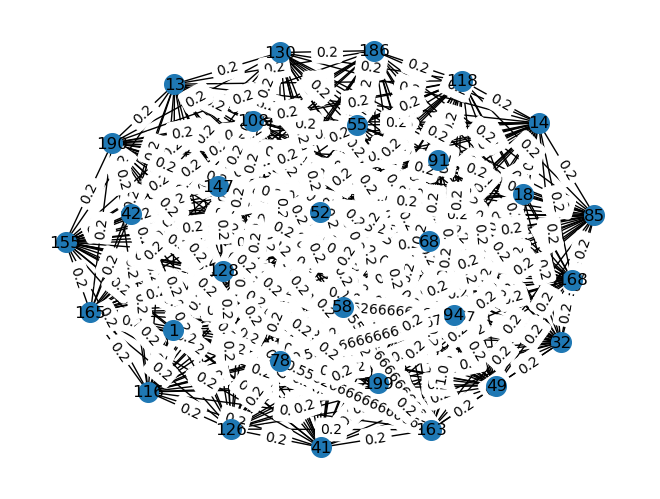

In [78]:
# Draw the graph with edge weights
pos = nx.spring_layout(current_iteration)
edge_labels = nx.get_edge_attributes(current_iteration, 'weight')
nx.draw(current_iteration, pos, with_labels=True, node_size=200)
nx.draw_networkx_edge_labels(current_iteration, pos, edge_labels=edge_labels)
plt.show()

In [79]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity-small.graphml')
similarity_graph = current_iteration

In [80]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [81]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,1,18,116,155,168,13,165,14,186,32,...,94,163,108,126,118,128,130,190,147,199
1,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
18,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
116,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
155,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
168,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [82]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv('results/rolesim/replies-253-dissimilarity-matrix.csv', index=True)

### full dataset, using *df_edge_list_directed_users_postings_replies.parquet*

In [3]:
# Load .parquet data
postings_replies = pd.read_parquet('data/df_edge_list_directed_users_postings_replies.parquet')

#### subset of 0.5% from full data

In [40]:
# Randomly sample 0.5% of data
subset_postings_replies = postings_replies.sample(frac=0.005, random_state=1)
subset_postings_votes.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [41]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [42]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [43]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 4611
Number of edges: 6232


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

1804  nodes were inserted in the graph.
7879132  nodes were pruned by rule 1.
1516696  nodes were pruned by rule 2.
1230723  nodes were pruned by rule 3.
1618
1804
[5, 727, 1378, 2057, 3090, 4217, 4537, 4540, 11, 3267, 3672, 16, 1801, 2675, 22, 23, 3089, 37, 3904, 50, 709, 2714, 3194, 53, 2780, 56, 927, 59, 4032, 4183, 64, 65, 74, 762, 1250, 2639, 3027, 3148, 4136, 4422, 4583, 87, 2771, 88, 89, 109, 652, 2124, 4051, 119, 592, 3903, 126, 3173, 3445, 128, 3676, 4265, 4420, 138, 2364, 2749, 3038, 3550, 142, 1537, 1854, 3100, 3921, 155, 156, 157, 161, 3411, 174, 1249, 2023, 178, 3824, 183, 491, 1702, 1972, 3533, 4406, 192, 1353, 4347, 204, 205, 217, 1377, 2798, 229, 230, 233, 1351, 1797, 2002, 2616, 236, 3241, 4438, 239, 4146, 4559, 240, 241, 245, 1696, 249, 3753, 4268, 253, 4036, 267, 3058, 277, 1758, 4085, 289, 3425, 293, 2832, 3842, 297, 298, 302, 1561, 317, 868, 2311, 4586, 325, 3386, 4549, 327, 328, 331, 332, 345, 346, 347, 2702, 3785, 3916, 349, 2258, 350, 2797, 357, 364, 3481, 373, 

In [45]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [46]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [47]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,5,727,1378,2057,3090,4217,4537,4540,11,3267,...,4533,4534,4535,4541,4597,4598,4602,4603,4608,4609
5,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
727,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
1378,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
2057,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
3090,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [48]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 1% from full data

In [49]:
# Randomly sample 1% of data
subset_postings_replies = postings_replies.sample(frac=0.01, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [50]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 6015
Number of edges: 12453


In [51]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 6015
Number of edges: 12453


In [52]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 6015
Number of edges: 12453


In [53]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

3126  nodes were inserted in the graph.
14977449  nodes were pruned by rule 1.
1692337  nodes were pruned by rule 2.
1414193  nodes were pruned by rule 3.
1750
3126
[0, 2631, 5, 68, 822, 2682, 12, 5273, 5916, 23, 3089, 37, 3904, 59, 3843, 4183, 5542, 5558, 5698, 74, 1250, 2639, 3027, 4136, 4375, 4422, 4749, 5193, 5241, 5429, 109, 2124, 2834, 5786, 5803, 5896, 119, 592, 4753, 5330, 5491, 5691, 5706, 5778, 126, 5480, 5562, 128, 2824, 3676, 4420, 4696, 4720, 5588, 5959, 131, 1693, 4632, 138, 3550, 4678, 5516, 5908, 155, 1854, 3100, 5287, 5293, 5553, 5853, 5956, 156, 157, 161, 3411, 165, 3386, 4549, 4729, 5279, 174, 2683, 5394, 178, 3249, 3824, 5246, 5355, 5626, 5737, 236, 3241, 4438, 5081, 239, 4474, 4959, 5649, 5907, 240, 241, 253, 4036, 4674, 258, 3308, 260, 4145, 293, 4608, 317, 1496, 4586, 4969, 325, 327, 328, 330, 4951, 433, 5164, 5652, 441, 3719, 4342, 4485, 5276, 468, 2296, 4545, 4768, 5557, 5777, 481, 489, 1870, 2958, 3544, 3696, 526, 2391, 3084, 5023, 541, 5572, 5721, 583, 3265, 

In [54]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [55]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [56]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,0,2631,5,68,822,2682,12,5273,5916,23,...,5952,5953,5962,5963,5973,5974,5987,5988,6012,6013
0,1.0,0.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.4736,...,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096
2631,0.0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.4736,...,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096,0.4096
5,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8000,...,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000
68,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8000,...,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000
822,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8000,...,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000


In [57]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

In [58]:
# nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

#### subset of 5% from full data

In [59]:
# Randomly sample 5% of data
subset_postings_replies = postings_replies.sample(frac=0.05, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [60]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 9004
Number of edges: 61783


In [61]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 9004
Number of edges: 61783


In [62]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 9004
Number of edges: 61783


In [63]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

8464  nodes were inserted in the graph.
37953329  nodes were pruned by rule 1.
1321416  nodes were pruned by rule 2.
1248297  nodes were pruned by rule 3.
1591
8464
[59, 4269, 6447, 6701, 6847, 7089, 7682, 8526, 8627, 8652, 8752, 68, 1365, 4248, 4305, 5810, 5837, 6838, 6841, 7240, 7406, 7766, 7854, 7989, 8196, 8468, 8609, 8676, 74, 4683, 4749, 5287, 5474, 5572, 6119, 7032, 7476, 7697, 8328, 8465, 8771, 8864, 8966, 119, 4420, 5242, 6349, 6668, 7051, 7589, 7656, 7686, 7718, 8383, 8494, 8557, 8588, 8736, 8821, 9000, 128, 4849, 5543, 6960, 7242, 7269, 7319, 7566, 8582, 8689, 8721, 8748, 8802, 8995, 206, 3906, 7746, 7902, 8106, 8126, 8342, 8819, 8916, 8937, 253, 5044, 5885, 6811, 7335, 7380, 7401, 7555, 8150, 8190, 8396, 8489, 8682, 8861, 607, 3533, 4367, 7675, 7871, 8014, 8364, 8493, 8962, 625, 6230, 6695, 7050, 7294, 7857, 8291, 8596, 8650, 8692, 8860, 8877, 8905, 8914, 696, 6712, 7357, 8474, 724, 842, 5121, 5382, 5910, 6061, 6410, 7094, 7165, 7588, 7668, 8365, 8534, 8690, 8852, 8902, 896

In [64]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [65]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [66]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,59,4269,6447,6701,6847,7089,7682,8526,8627,8652,...,8873,8979,8876,8893,8897,8912,8913,8934,8946,8963
59,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
4269,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
6447,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
6701,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
6847,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [67]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 10% from full data

In [4]:
# Randomly sample 10% of data
subset_postings_replies = postings_replies.sample(frac=0.1, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [5]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 9910
Number of edges: 122349


In [6]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 9910
Number of edges: 122349


In [7]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 9910
Number of edges: 122349


In [8]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

9994  nodes were inserted in the graph.
47160597  nodes were pruned by rule 1.
984736  nodes were pruned by rule 2.
943768  nodes were pruned by rule 3.
1466
9994
[68, 1365, 5810, 5837, 5969, 6841, 7240, 7854, 8609, 9180, 9190, 9664, 74, 7419, 119, 9000, 9458, 128, 5543, 6349, 7269, 7319, 7566, 8582, 8689, 8721, 8736, 9156, 9300, 9378, 9465, 9583, 9588, 9642, 9659, 9660, 9669, 9697, 9768, 9841, 9877, 9904, 206, 6320, 6512, 6714, 7718, 8106, 8552, 8608, 8655, 8819, 9088, 9296, 9457, 9546, 9627, 9670, 9750, 9874, 253, 5885, 7232, 7335, 7380, 7555, 7714, 8150, 8190, 8282, 8396, 8489, 8562, 8861, 9134, 9170, 9658, 9742, 9869, 625, 8830, 696, 7357, 7497, 9212, 752, 1323, 4757, 8662, 8681, 8771, 8833, 9045, 9213, 9350, 9493, 9552, 9571, 842, 8327, 1173, 6847, 7875, 8692, 8917, 9228, 9501, 9853, 1728, 2033, 4701, 5971, 7930, 8697, 8718, 8945, 8994, 9434, 9454, 9527, 9646, 9650, 9845, 1437, 7763, 8971, 1457, 8369, 1635, 8314, 5510, 6354, 7079, 7579, 8144, 8550, 8820, 9597, 9647, 9703, 9730, 17

In [9]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [10]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [11]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,68,1365,5810,5837,5969,6841,7240,7854,8609,9180,...,9801,9804,9826,9834,9840,9843,9851,9854,9864,9894
68,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
1365,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
5810,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
5837,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
5969,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [12]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 20% from full data

In [13]:
# Randomly sample 20% of data
subset_postings_replies = postings_replies.sample(frac=0.2, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [14]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 10647
Number of edges: 239584


In [15]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 10647
Number of edges: 239584


In [16]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 10647
Number of edges: 239584


In [17]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

11394  nodes were inserted in the graph.
55315939  nodes were pruned by rule 1.
681289  nodes were pruned by rule 2.
665359  nodes were pruned by rule 3.
1331
11394
[68, 1365, 5577, 7854, 7889, 8609, 9180, 9649, 9951, 9978, 10094, 10176, 10202, 10208, 10249, 10377, 10474, 10521, 10639, 10642, 119, 7566, 8442, 8783, 752, 5287, 7027, 830, 10071, 1173, 7942, 9120, 1291, 6841, 9218, 10019, 10028, 10184, 10241, 1323, 2033, 3037, 5971, 8001, 8482, 8971, 8994, 9159, 9398, 9436, 9466, 9598, 9646, 9650, 9654, 9941, 10096, 10234, 10244, 10272, 10273, 10446, 10590, 10612, 10621, 9387, 10568, 1437, 6850, 9102, 10007, 10054, 10067, 10086, 10089, 10159, 10289, 10524, 10535, 10544, 10635, 1457, 8183, 1728, 9454, 10124, 1733, 2971, 5543, 7264, 7615, 7726, 7875, 8062, 8787, 8899, 9019, 9546, 9723, 9750, 9909, 10232, 10246, 10348, 10355, 10480, 10518, 10592, 10620, 10624, 1987, 5274, 9730, 6578, 7476, 8343, 8395, 8580, 8867, 9186, 9247, 9278, 9296, 9520, 9632, 9697, 9911, 10062, 10142, 10194, 10217, 102

In [18]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [19]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [20]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,68,1365,5577,7854,7889,8609,9180,9649,9951,9978,...,10528,10529,10542,10550,10554,10573,10614,10606,10610,10640
68,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
1365,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
5577,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7854,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7889,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [21]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 50% from full data

In [22]:
# Randomly sample 50% of data
subset_postings_replies = postings_replies.sample(frac=0.5, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [23]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 11323
Number of edges: 560880


In [24]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 11323
Number of edges: 560880


In [25]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 11323
Number of edges: 560880


In [26]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/replies-{G.number_of_nodes()}-similarity.graphml')

12435  nodes were inserted in the graph.
63311636  nodes were pruned by rule 1.
386943  nodes were pruned by rule 2.
388489  nodes were pruned by rule 3.
1276
12435
[128, 4011, 9726, 253, 9212, 709, 6408, 752, 9557, 1291, 8753, 9777, 10019, 10084, 10119, 10153, 10257, 10503, 10903, 1323, 5766, 5971, 7726, 9114, 9398, 9551, 9595, 9650, 10202, 10244, 10261, 10272, 10372, 10380, 10446, 10474, 10563, 10571, 10592, 10617, 10669, 10683, 10686, 10726, 10762, 10770, 10788, 10796, 10813, 10857, 10982, 10986, 11106, 11167, 11172, 11206, 11228, 11247, 11263, 11271, 11276, 11286, 11304, 11311, 1365, 5910, 8144, 8651, 10025, 10224, 10695, 10871, 11004, 11024, 11049, 11062, 1733, 9710, 10469, 10805, 11115, 2033, 10315, 2053, 7466, 2239, 8989, 2534, 8902, 2647, 10164, 10624, 10663, 11171, 2700, 9222, 2735, 5406, 6129, 7806, 11161, 11187, 2982, 11065, 3037, 10223, 10294, 10572, 10590, 10684, 3071, 5510, 10603, 10924, 10980, 3090, 8396, 8701, 8850, 9354, 9702, 10176, 10392, 10693, 3362, 8597, 9352, 104

In [27]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [28]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [29]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,128,4011,9726,253,9212,709,6408,752,9557,1291,...,11243,11262,11270,11274,11280,11281,11285,11309,11314,11316
128,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
4011,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
9726,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
253,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
9212,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [30]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/replies-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

# Votes

### small sample, using *votes-253.graphml*

In [83]:
# Load directed graph
directed_graph = nx.read_graphml('graphs/votes-253.graphml')
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")


Number of nodes: 253
Number of edges: 6081


In [84]:
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 252
Number of edges: 6081


In [85]:
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 252
Number of edges: 6081


In [86]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
global actual_data_graph
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 252
Number of edges: 6081


In [87]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/votes-253-similarity.graphml')

11  nodes were inserted in the graph.
31338  nodes were pruned by rule 1.
128  nodes were pruned by rule 2.
149  nodes were pruned by rule 3.
17
11
[21, 160, 39, 98, 146, 50, 161, 51, 55, 179, 67, 89, 116, 173, 207, 235, 247]
[(21, 160), (39, 98), (39, 146), (98, 146), (50, 161), (51, 55), (51, 179), (67, 89), (116, 173), (116, 207), (235, 247)]
Found current edges with weights,  11  of them.
Current count of edges,  136
Initial Graph of pruned magnitude
17
[21, 160, 39, 98, 146, 50, 161, 51, 55, 179, 67, 89, 116, 173, 207, 235, 247]
--------------------
Iteration  1
--------------------
Previous_iteration
[(21, 160, {'weight': 1.0}), (21, 39, {'weight': 0.3066666666666667}), (21, 98, {'weight': 0.3066666666666667}), (21, 146, {'weight': 0.3066666666666667})]
Current_iteration
[(21, 160, {'weight': 0.2}), (21, 39, {'weight': 0.2}), (21, 98, {'weight': 0.2}), (21, 146, {'weight': 0.2})]
Elapsed time  0.01577448844909668
--------------------
Difference between iterations 29.7599999999999

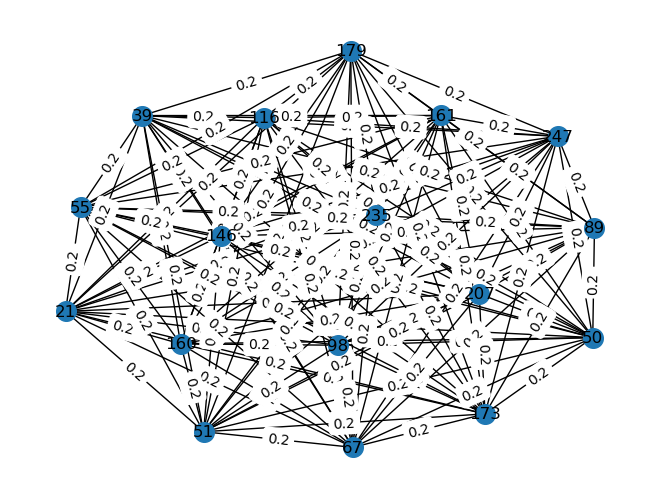

In [88]:
# Draw the graph with edge weights
pos = nx.spring_layout(current_iteration)
edge_labels = nx.get_edge_attributes(current_iteration, 'weight')
nx.draw(current_iteration, pos, with_labels=True, node_size=200)
nx.draw_networkx_edge_labels(current_iteration, pos, edge_labels=edge_labels)
plt.show()

In [89]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity-small.graphml')
similarity_graph = current_iteration

In [90]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [91]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,21,160,39,98,146,50,161,51,55,179,67,89,116,173,207,235,247
21,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
160,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
39,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
98,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
146,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [92]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv('results/rolesim/votes-253-dissimilarity-matrix.csv', index=True)

### full dataset, using *df_edge_list_directed_users_votes_to_postings_net.parquet*

In [4]:
# Load .parquet data
postings_votes = pd.read_parquet('data/df_edge_list_directed_users_votes_to_postings_net.parquet')

#### subset of 5% from full data

In [5]:
# Randomly sample 5% of data
subset_postings_votes = postings_votes.sample(frac=0.05, random_state=1)
subset_postings_votes.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_votes_to_postings_net
167062,15518,545120,1
3052552,329399,577784,1
536332,41368,36862,1
1108806,88588,227267,1
1423945,119871,527356,2


In [7]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_votes is the weight of the edges
for _, row in subset_postings_votes.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_votes_to_postings_net']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 12046
Number of edges: 304021


In [8]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12046
Number of edges: 304021


In [9]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12046
Number of edges: 304021


In [10]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/votes-{G.number_of_nodes()}-similarity.graphml')

1359  nodes were inserted in the graph.
71658119  nodes were pruned by rule 1.
454421  nodes were pruned by rule 2.
433136  nodes were pruned by rule 3.
516
1359
[1304, 10883, 1554, 10592, 11228, 2182, 11594, 2993, 10544, 3030, 9994, 11071, 11300, 11816, 11892, 11896, 11908, 3900, 11669, 4079, 10604, 11261, 11408, 11481, 11992, 12010, 12032, 12034, 4924, 11368, 5382, 11312, 11879, 5428, 11230, 11268, 11798, 11968, 5758, 11424, 5859, 11801, 11887, 11897, 5988, 11377, 11512, 6338, 9323, 11409, 6347, 8560, 6867, 11997, 6974, 11578, 7099, 9406, 10269, 11710, 11762, 7200, 9080, 9148, 10127, 11186, 11983, 12036, 7363, 10343, 11709, 11966, 7444, 11756, 11899, 11942, 7497, 9463, 11349, 7519, 7977, 9866, 10511, 10800, 11458, 11843, 11924, 7928, 10160, 7951, 11242, 11880, 12005, 7986, 11413, 8033, 8037, 8680, 11985, 8088, 11556, 8107, 11499, 11597, 11850, 8257, 8802, 9808, 11617, 11852, 8267, 8325, 11113, 11278, 8536, 11040, 11336, 11965, 8686, 11524, 11119, 8927, 10323, 11781, 11927, 8945, 1186

In [11]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [12]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [13]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,1304,10883,1554,10592,11228,2182,11594,2993,10544,3030,...,11936,12033,12030,11941,11946,11994,11964,11979,12021,12029
1304,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
10883,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
1554,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
10592,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
11228,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [14]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/votes-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 10% from full data

In [15]:
# Randomly sample 10% of data
subset_postings_votes = postings_votes.sample(frac=0.1, random_state=1)
subset_postings_votes.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_votes_to_postings_net
167062,15518,545120,1
3052552,329399,577784,1
536332,41368,36862,1
1108806,88588,227267,1
1423945,119871,527356,2


In [16]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_votes is the weight of the edges
for _, row in subset_postings_votes.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_votes_to_postings_net']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 12257
Number of edges: 605498


In [17]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12257
Number of edges: 605498


In [18]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12257
Number of edges: 605498


In [19]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/votes-{G.number_of_nodes()}-similarity.graphml')

734  nodes were inserted in the graph.
74634936  nodes were pruned by rule 1.
241324  nodes were pruned by rule 2.
233902  nodes were pruned by rule 3.
339
734
[1304, 10883, 3030, 7200, 11590, 11880, 11908, 12042, 12123, 12198, 12234, 4079, 11261, 11971, 12032, 12199, 4107, 11312, 11413, 5428, 10156, 11230, 12132, 12190, 12215, 12246, 12249, 7099, 11710, 11762, 12051, 12221, 12192, 7951, 11506, 11959, 7977, 12183, 8037, 8680, 12048, 12251, 8536, 12089, 11899, 12015, 8802, 12084, 12239, 9080, 9657, 9085, 10147, 11659, 11711, 11846, 11849, 12009, 12119, 12226, 9323, 11186, 9406, 11583, 12205, 9564, 11997, 12071, 12090, 12113, 12175, 9645, 11560, 9797, 12121, 9862, 10785, 9913, 12151, 9940, 12064, 9985, 12081, 12177, 10026, 10063, 10142, 11368, 12054, 12055, 12073, 12091, 12230, 12160, 12180, 12240, 10182, 11551, 10186, 10273, 11757, 11843, 10274, 11424, 10319, 11776, 11826, 12041, 12256, 10323, 10331, 10500, 10353, 11933, 10421, 11594, 11658, 10439, 10604, 10447, 12245, 12253, 10464, 113

In [20]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [21]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [22]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,1304,10883,3030,7200,11590,11880,11908,12042,12123,12198,...,12194,12195,12243,12210,12212,12217,12222,12223,12229,12242
1304,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
10883,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
3030,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7200,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
11590,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [23]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/votes-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 20% from full data

In [24]:
# Randomly sample 20% of data
subset_postings_votes = postings_votes.sample(frac=0.2, random_state=1)
subset_postings_votes.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_votes_to_postings_net
167062,15518,545120,1
3052552,329399,577784,1
536332,41368,36862,1
1108806,88588,227267,1
1423945,119871,527356,2


In [25]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_votes is the weight of the edges
for _, row in subset_postings_votes.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_votes_to_postings_net']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 12400
Number of edges: 1201148


In [26]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12400
Number of edges: 1201148


In [27]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12400
Number of edges: 1201148


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/votes-{G.number_of_nodes()}-similarity.graphml')

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,68,1365,5577,7854,7889,8609,9180,9649,9951,9978,...,10528,10529,10542,10550,10554,10573,10614,10606,10610,10640
68,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
1365,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
5577,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7854,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7889,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/votes-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 50% from full data

In [35]:
# Randomly sample 50% of data
subset_postings_votes = postings_votes.sample(frac=0.5, random_state=1)
subset_postings_votes.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_votes_to_postings_net
167062,15518,545120,1
3052552,329399,577784,1
536332,41368,36862,1
1108806,88588,227267,1
1423945,119871,527356,2


In [36]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_votes.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_votes_to_postings_net']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 12488
Number of edges: 2928746


In [37]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12488
Number of edges: 2928746


In [38]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12488
Number of edges: 2928746


In [39]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/votes-{G.number_of_nodes()}-similarity.graphml')

KeyboardInterrupt: 

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,0,32,33,48,67,83,108,178,212,213,...,174,177,180,196,201,202,207,210,260,270
0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
32,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
33,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
48,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
67,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/votes-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

## Follows

### small sample, using *follows-253.graphml*

In [93]:
# Load directed graph
directed_graph = nx.read_graphml('graphs/follows-253.graphml')
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")


Number of nodes: 253
Number of edges: 373


In [94]:
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 253
Number of edges: 373


In [95]:
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 253
Number of edges: 373


In [96]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
global actual_data_graph
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 253
Number of edges: 373


In [97]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/follows-253-similarity.graphml')

429  nodes were inserted in the graph.
22220  nodes were pruned by rule 1.
5652  nodes were pruned by rule 2.
3577  nodes were pruned by rule 3.
112
429
[0, 91, 125, 171, 221, 222, 223, 224, 225, 1, 3, 90, 4, 38, 67, 131, 7, 10, 11, 52, 18, 30, 102, 164, 19, 182, 20, 191, 26, 35, 36, 94, 95, 126, 156, 195, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 243, 244, 245, 246, 247, 248, 249, 43, 96, 45, 50, 89, 51, 53, 84, 56, 82, 64, 69, 72, 106, 74, 189, 190, 79, 213, 83, 150, 208, 209, 210, 220, 109, 142, 119, 123, 129, 127, 135, 137, 141, 145, 146, 184, 211, 227, 228, 229, 149, 155, 159, 161, 175, 178, 179, 180, 185, 187, 181, 197, 198, 200, 202, 204, 205, 226]
[(0, 91), (0, 125), (0, 171), (0, 221), (0, 222), (0, 223), (0, 224), (0, 225), (91, 1), (91, 7), (91, 10), (91, 18), (91, 35), (91, 51), (91, 67), (125, 1), (125, 7), (125, 10), (125, 18), (125, 35), (125, 51), (125, 67), (125, 102), (171, 26), (171, 45), (171, 64), (171, 74), (171, 146), (171, 149), (171, 161), (221, 1), (22

In [98]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity-small.graphml')
similarity_graph = current_iteration

In [99]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [100]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,0,91,125,171,221,222,223,224,225,1,...,185,187,181,197,198,200,202,204,205,226
0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
91,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
125,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
171,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
221,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [101]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv('results/rolesim/follows-253-dissimilarity-matrix.csv', index=True)

### full dataset, using *df_edge_list_directed_users_combined_postings_replies_and_votes_to_postings_net_and_follow_connections.parquet*

In [102]:
# Load .parquet data
postings_follows = pd.read_parquet('data/df_edge_list_directed_users_combined_postings_replies_and_votes_to_postings_net_and_follow_connections.parquet')

#### subset of 5% from full data

In [ ]:
# Randomly sample 5% of data
subset_postings_follows = postings_follows.sample(frac=0.05, random_state=1)
subset_postings_follows.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_votes_to_postings_net
167062,15518,545120,1
3052552,329399,577784,1
536332,41368,36862,1
1108806,88588,227267,1
1423945,119871,527356,2


In [ ]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_votes is the weight of the edges
for _, row in subset_postings_follows.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_follow_connection']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 12046
Number of edges: 304021


In [ ]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12046
Number of edges: 304021


In [ ]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12046
Number of edges: 304021


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/follows-{G.number_of_nodes()}-similarity.graphml')

1359  nodes were inserted in the graph.
71658119  nodes were pruned by rule 1.
454421  nodes were pruned by rule 2.
433136  nodes were pruned by rule 3.
516
1359
[1304, 10883, 1554, 10592, 11228, 2182, 11594, 2993, 10544, 3030, 9994, 11071, 11300, 11816, 11892, 11896, 11908, 3900, 11669, 4079, 10604, 11261, 11408, 11481, 11992, 12010, 12032, 12034, 4924, 11368, 5382, 11312, 11879, 5428, 11230, 11268, 11798, 11968, 5758, 11424, 5859, 11801, 11887, 11897, 5988, 11377, 11512, 6338, 9323, 11409, 6347, 8560, 6867, 11997, 6974, 11578, 7099, 9406, 10269, 11710, 11762, 7200, 9080, 9148, 10127, 11186, 11983, 12036, 7363, 10343, 11709, 11966, 7444, 11756, 11899, 11942, 7497, 9463, 11349, 7519, 7977, 9866, 10511, 10800, 11458, 11843, 11924, 7928, 10160, 7951, 11242, 11880, 12005, 7986, 11413, 8033, 8037, 8680, 11985, 8088, 11556, 8107, 11499, 11597, 11850, 8257, 8802, 9808, 11617, 11852, 8267, 8325, 11113, 11278, 8536, 11040, 11336, 11965, 8686, 11524, 11119, 8927, 10323, 11781, 11927, 8945, 1186

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,1304,10883,1554,10592,11228,2182,11594,2993,10544,3030,...,11936,12033,12030,11941,11946,11994,11964,11979,12021,12029
1304,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
10883,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
1554,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
10592,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
11228,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/follows-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 10% from full data

In [ ]:
# Randomly sample 10% of data
subset_postings_follows = postings_follows.sample(frac=0.1, random_state=1)
subset_postings_follows.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_votes_to_postings_net
167062,15518,545120,1
3052552,329399,577784,1
536332,41368,36862,1
1108806,88588,227267,1
1423945,119871,527356,2


In [ ]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_votes is the weight of the edges
for _, row in subset_postings_follows.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_follow_connection']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 12257
Number of edges: 605498


In [ ]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12257
Number of edges: 605498


In [ ]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12257
Number of edges: 605498


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/follows-{G.number_of_nodes()}-similarity.graphml')

734  nodes were inserted in the graph.
74634936  nodes were pruned by rule 1.
241324  nodes were pruned by rule 2.
233902  nodes were pruned by rule 3.
339
734
[1304, 10883, 3030, 7200, 11590, 11880, 11908, 12042, 12123, 12198, 12234, 4079, 11261, 11971, 12032, 12199, 4107, 11312, 11413, 5428, 10156, 11230, 12132, 12190, 12215, 12246, 12249, 7099, 11710, 11762, 12051, 12221, 12192, 7951, 11506, 11959, 7977, 12183, 8037, 8680, 12048, 12251, 8536, 12089, 11899, 12015, 8802, 12084, 12239, 9080, 9657, 9085, 10147, 11659, 11711, 11846, 11849, 12009, 12119, 12226, 9323, 11186, 9406, 11583, 12205, 9564, 11997, 12071, 12090, 12113, 12175, 9645, 11560, 9797, 12121, 9862, 10785, 9913, 12151, 9940, 12064, 9985, 12081, 12177, 10026, 10063, 10142, 11368, 12054, 12055, 12073, 12091, 12230, 12160, 12180, 12240, 10182, 11551, 10186, 10273, 11757, 11843, 10274, 11424, 10319, 11776, 11826, 12041, 12256, 10323, 10331, 10500, 10353, 11933, 10421, 11594, 11658, 10439, 10604, 10447, 12245, 12253, 10464, 113

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,1304,10883,3030,7200,11590,11880,11908,12042,12123,12198,...,12194,12195,12243,12210,12212,12217,12222,12223,12229,12242
1304,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
10883,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
3030,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7200,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
11590,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/follows-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 20% from full data

In [ ]:
# Randomly sample 20% of data
subset_postings_follows = postings_follows.sample(frac=0.2, random_state=1)
subset_postings_follows.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_votes_to_postings_net
167062,15518,545120,1
3052552,329399,577784,1
536332,41368,36862,1
1108806,88588,227267,1
1423945,119871,527356,2


In [ ]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_votes is the weight of the edges
for _, row in subset_postings_follows.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_follow_connection']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 12400
Number of edges: 1201148


In [ ]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12400
Number of edges: 1201148


In [ ]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12400
Number of edges: 1201148


In [ ]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/follows-{G.number_of_nodes()}-similarity.graphml')

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,68,1365,5577,7854,7889,8609,9180,9649,9951,9978,...,10528,10529,10542,10550,10554,10573,10614,10606,10610,10640
68,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
1365,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
5577,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7854,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7889,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/follows-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)

#### subset of 50% from full data

In [103]:
# Randomly sample 50% of data
subset_postings_follows = postings_follows.sample(frac=0.5, random_state=1)
subset_postings_follows.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies,count_votes_to_postings_net,count_follow_connection,weight_total
4011949,504370,155849,0,3,0,3.443764
3239276,237828,554655,0,1,0,1.147921
5613175,558742,231049,0,1,0,1.147921
5750859,563714,587113,0,1,0,1.147921
5966199,570140,561877,1,0,0,7.834393


In [104]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_follows.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_follow_connection']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 12505
Number of edges: 3282183


In [105]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12505
Number of edges: 3282183


In [106]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 12505
Number of edges: 3282183


In [107]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, f'results/rolesim/follows-{G.number_of_nodes()}-similarity.graphml')

KeyboardInterrupt: 

In [ ]:
# Load the similarity graph
# similarity_graph = nx.read_graphml('RoleSim/role_similarity.graphml')
similarity_graph = current_iteration

In [ ]:
# Get the list of nodes and create a mapping for sequential indices
nodes = list(similarity_graph.nodes())
node_to_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)

# Initialize the dissimilarity matrix
dissimilarity_matrix = np.ones((n, n))  # Start with all ones (max dissimilarity)

# Fill in the matrix with 1 - similarity scores
for edge in similarity_graph.edges(data=True):
    source = node_to_index[edge[0]]  # Map source node to sequential index
    target = node_to_index[edge[1]]  # Map target node to sequential index
    similarity = edge[2].get('weight', 0)  # Similarity score (default 0)
    dissimilarity = 1 - similarity
    dissimilarity_matrix[source, target] = dissimilarity
    dissimilarity_matrix[target, source] = dissimilarity  # Ensure symmetry

In [ ]:
# Create a DataFrame for easier handling
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=nodes, columns=nodes)
dissimilarity_df.head()

,0,32,33,48,67,83,108,178,212,213,...,174,177,180,196,201,202,207,210,260,270
0,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
32,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
33,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
48,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
67,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [ ]:
# Save the matrix to a CSV file
dissimilarity_df.to_csv(f'results/rolesim/follows-{G.number_of_nodes()}-dissimilarity-matrix.csv', index=True)